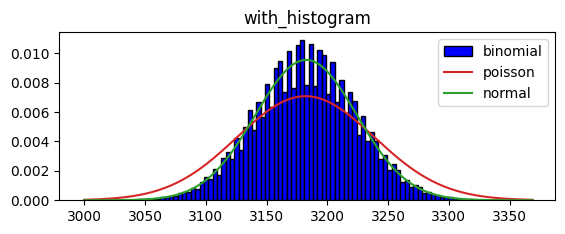

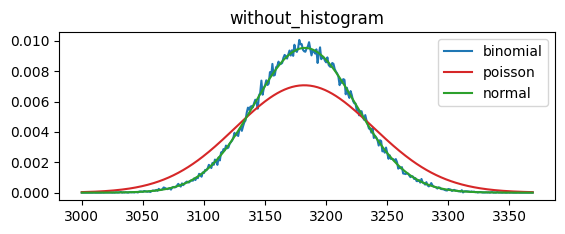

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

n = 7072
p = 0.45
mean = 3182.59
s_deviation = 41.84
poi_landa = 3182.59
samples = np.arange(3000,3370,1)
x_ax = np.arange(3000,3370,1)
y_ax = np.arange(0.00,1.01,0.01)


bino = np.random.binomial(n,p,100000)
bino_probs = [0] * 370
for i in range(len(bino)):
    bino[i] -= 3000
for num in bino:
    if num >= 0 and num <= 369:
        bino_probs[num] += 1
    else:
        continue

for i in range(len(bino)):
    bino[i] += 3000
sum = 0
for num in bino_probs:
    sum += num
for i in range(len(bino_probs)):
    bino_probs[i] = bino_probs[i] / sum


poi_probs = poisson.pmf(k = samples,mu= poi_landa)


norm_probs = []
norm_distro = norm(loc = mean,scale = s_deviation)
norm_probs = norm_distro.pdf(x = samples)
plt.subplot(211)
plt.hist(bino,bins=100,density=True,color="blue",edgecolor="black",label="binomial")
plt.plot(x_ax,poi_probs,color = "tab:red", label="poisson")
plt.plot(x_ax,norm_probs,color = "tab:green", label="normal")
plt.title("with_histogram")
plt.legend()
plt.show()
plt.subplot(212)
plt.plot(x_ax,bino_probs,color="tab:blue",label="binomial")
plt.plot(x_ax,poi_probs,color = "tab:red", label="poisson")
plt.plot(x_ax,norm_probs,color = "tab:green", label="normal")
plt.title("without_histogram")
plt.legend()
plt.show()
